In [1]:
import numpy as np
import pandas as pd

In [149]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [150]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'],inplace = True)

In [93]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Gender'>

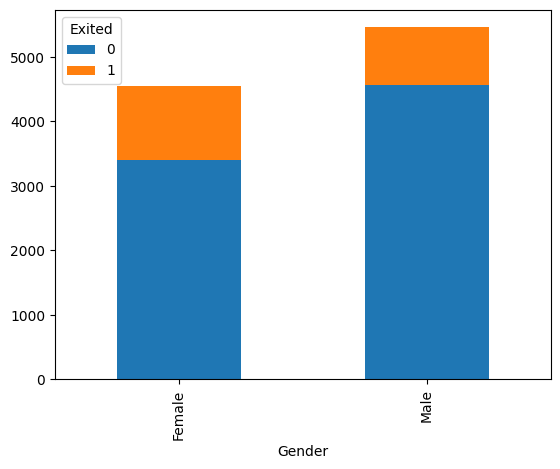

In [77]:
gender_exited_counts = df.groupby(['Gender','Exited']).size().unstack()
gender_exited_counts.plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='IsActiveMember'>

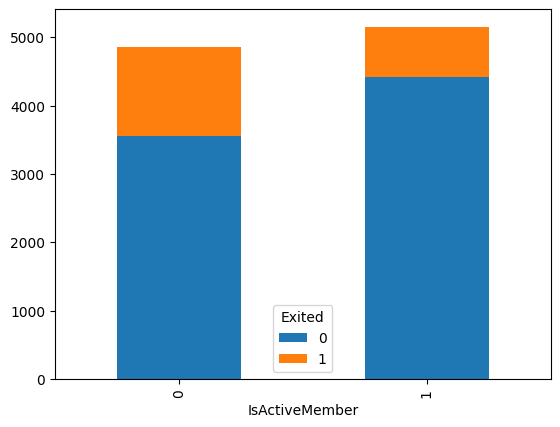

In [78]:
gender_exited_counts = df.groupby(['IsActiveMember', 'Exited']).size().unstack()
gender_exited_counts.plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='HasCrCard'>

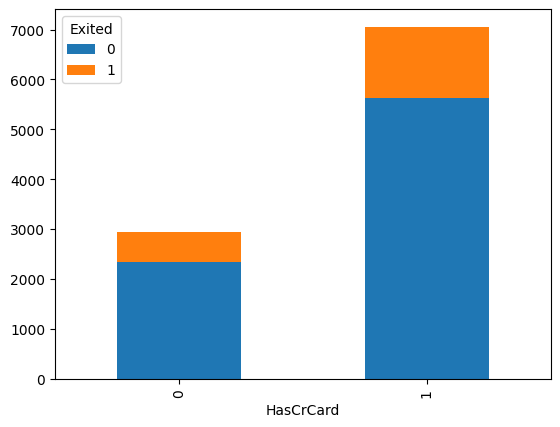

In [79]:
gender_exited_counts = df.groupby(['HasCrCard', 'Exited']).size().unstack()
gender_exited_counts.plot(kind='bar', stacked=True)

In [84]:
df[df['Exited']==1].describe()[['Tenure','Balance','NumOfProducts','EstimatedSalary']]

,Tenure,Balance,NumOfProducts,EstimatedSalary
count,2037.000000,2037.000000,2037.000000,2037.000000
mean,4.932744,91108.539337,1.475209,101465.677531
std,2.936106,58360.794816,0.801521,57912.418071
min,0.000000,0.000000,1.000000,11.580000
25%,2.000000,38340.020000,1.000000,51907.720000
50%,5.000000,109349.290000,1.000000,102460.840000
75%,8.000000,131433.330000,2.000000,152422.910000
max,10.000000,250898.090000,4.000000,199808.100000


In [85]:
df[df['Exited']==0].describe()[['Tenure','Balance','NumOfProducts','EstimatedSalary']]

,Tenure,Balance,NumOfProducts,EstimatedSalary
count,7963.000000,7963.000000,7963.000000,7963.000000
mean,5.033279,72745.296779,1.544267,99738.391772
std,2.880658,62848.040701,0.509536,57405.586966
min,0.000000,0.000000,1.000000,90.070000
25%,3.000000,0.000000,1.000000,50783.490000
50%,5.000000,92072.680000,2.000000,99645.040000
75%,7.000000,126410.280000,2.000000,148609.955000
max,10.000000,221532.800000,3.000000,199992.480000


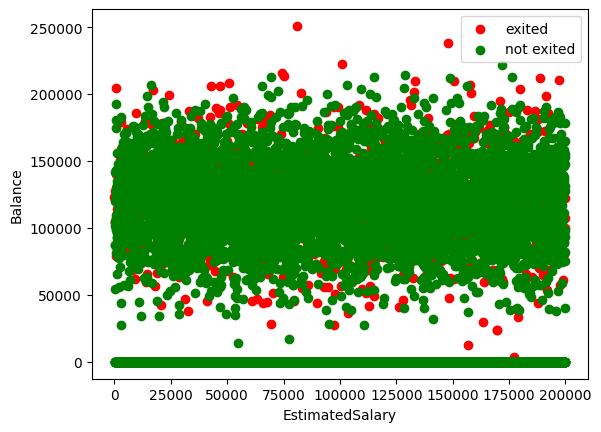

In [158]:
exited = df[df['Exited'] == 1]
plt.scatter(exited['EstimatedSalary'],exited['Balance'], color = 'red',label = 'exited')

not_exited = df[df['Exited'] == 0]
plt.scatter(not_exited['EstimatedSalary'],not_exited['Balance'],color = 'green',label = 'not exited')

plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [86]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [87]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [159]:
df = pd.get_dummies(df,columns=['Gender','Geography'],drop_first = True)

In [160]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [161]:
X = df.drop(columns = ['Exited'])
y = df['Exited'].values

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [173]:
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=11))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [174]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                120       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [176]:
history = model.fit(X_train_scaled,y_train, batch_size = 50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7958 - val_loss: 0.5053 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 551us/step - loss: 0.5055 - accuracy: 0.7958 - val_loss: 0.5034 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 546us/step - loss: 0.5040 - accuracy: 0.7958 - val_loss: 0.5013 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 536us/step - loss: 0.5006 - accuracy: 0.7958 - val_loss: 0.4957 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 556us/step - loss: 0.4907 - accuracy: 0.7958 - val_loss: 0.4827 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 563us/step - loss: 0.4716 - accuracy: 0.7958 - val_loss: 0.4613 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 571us/step - loss: 0.4490 - accuracy: 0.7958 - val_loss: 0.4449 - val_accu

128/128 [==============================] - 0s 539us/step - loss: 0.3489 - accuracy: 0.8591 - val_loss: 0.3623 - val_accuracy: 0.8556
Epoch 58/100
128/128 [==============================] - 0s 553us/step - loss: 0.3480 - accuracy: 0.8589 - val_loss: 0.3624 - val_accuracy: 0.8544
Epoch 59/100
128/128 [==============================] - 0s 536us/step - loss: 0.3474 - accuracy: 0.8597 - val_loss: 0.3613 - val_accuracy: 0.8575
Epoch 60/100
128/128 [==============================] - 0s 538us/step - loss: 0.3461 - accuracy: 0.8609 - val_loss: 0.3621 - val_accuracy: 0.8537
Epoch 61/100
128/128 [==============================] - 0s 536us/step - loss: 0.3461 - accuracy: 0.8589 - val_loss: 0.3607 - val_accuracy: 0.8569
Epoch 62/100
128/128 [==============================] - 0s 560us/step - loss: 0.3440 - accuracy: 0.8614 - val_loss: 0.3612 - val_accuracy: 0.8569
Epoch 63/100
128/128 [==============================] - 0s 548us/step - loss: 0.3444 - accuracy: 0.8598 - val_loss: 0.3606 - val_accuracy

In [177]:
y_pred = model.predict(X_test_scaled).argmax(axis=-1)

63/63 [==============================] - 0s 323us/step


In [178]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

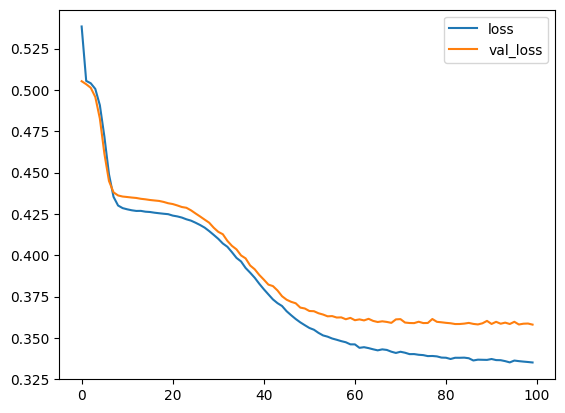

In [180]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

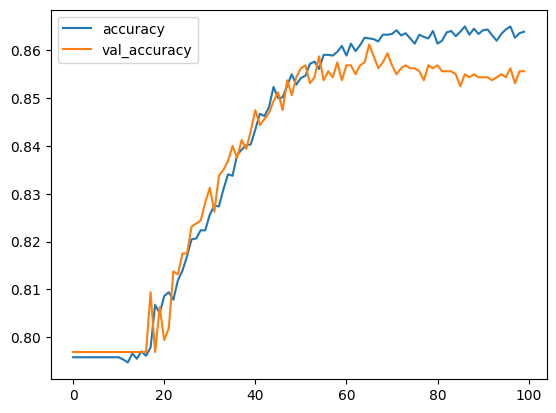

In [181]:
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.legend()
plt.show()